In [1]:
import os
# Function to rename multiple files
def main():
   i = 0
   path="Tomato_Late_blite/"
    
   for filename in os.listdir(path):
      my_dest ="Tomato_Late_blite" + str(i) + ".jpg"
      my_source =path + filename
      my_dest =path + my_dest
      # rename() function will
      # rename all the files
      os.rename(my_source, my_dest)
      i += 1
# Driver Code
if __name__ == '__main__':
   # Calling main() function
   main()
print('success')

success


In [2]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Pepper__bell___Bacterial_spott' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()


<Figure size 640x480 with 9 Axes>

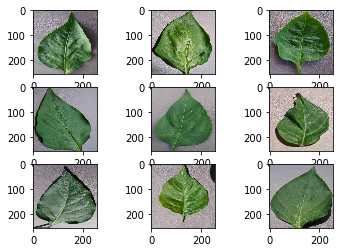

In [3]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Pepper__bell___healthy' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

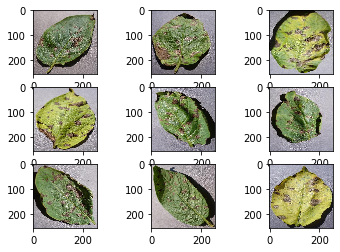

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Potato___Early_blight' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

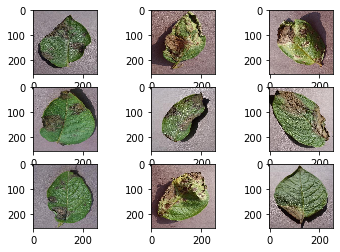

In [5]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Potato___Late_blightt' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

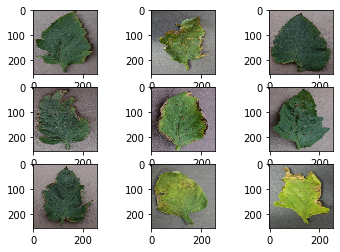

In [6]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Tomato_Bacterial_spot' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

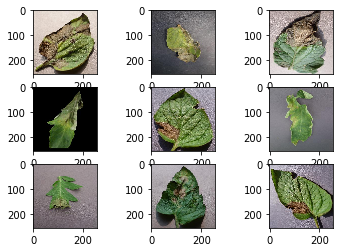

In [7]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'Tomato_Late_blite' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [8]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('Pepper__bell___Bacterial_spott'):
        output = 1.0
        if file.startswith('Pepper__bell___healthy'):
            output = 2.0
        if file.startswith('Potato___Early_blight'):
            output = 3.0
        if file.startswith('Potato___Late_blightt'):
            output = 4.0
        if file.startswith('Tomato_Bacterial_spot'):
            output = 5.0
        if file.startswith('Tomato_Late_blite'):
            output = 6.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('notes_photos.npy', photos)
save('notes_labels.npy', labels)
# save the final model to file


Using TensorFlow backend.


(4857, 200, 200, 3) (4857,)


In [15]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
 
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(6, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)  
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model


In [16]:
def run_test_harness():
# define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('dataset_plants/train/',
        class_mode='sparse', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
    # save model
    model.save('notes_model.h5')

# entry point, run the test harness
run_test_harness()


Found 4272 images belonging to 6 classes.
Epoch 1/10
67/67 [==============================] - 535s 8s/step - loss: 3.4681 - accuracy: 0.6245
Epoch 2/10
67/67 [==============================] - 544s 8s/step - loss: 0.2531 - accuracy: 0.9185
Epoch 3/10
67/67 [==============================] - 567s 8s/step - loss: 0.0840 - accuracy: 0.9757
Epoch 4/10
67/67 [==============================] - 715s 11s/step - loss: 0.0259 - accuracy: 0.9925
Epoch 5/10
67/67 [==============================] - 679s 10s/step - loss: 0.0086 - accuracy: 0.9974
Epoch 6/10
67/67 [==============================] - 638s 10s/step - loss: 0.0051 - accuracy: 0.9984
Epoch 7/10
67/67 [==============================] - 591s 9s/step - loss: 0.0038 - accuracy: 0.9986
Epoch 8/10
67/67 [==============================] - 559s 8s/step - loss: 0.0036 - accuracy: 0.9986
Epoch 9/10
67/67 [==============================] - 557s 8s/step - loss: 0.0035 - accuracy: 0.9986
Epoch 10/10
67/67 [==============================] - 571s 9s/ste

In [18]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt
converter = lite.TFLiteConverter.from_keras_model_file( 'notes_model.h5' ) 
model = converter.convert()
file = open( 'output.tflite' , 'wb' ) 
file.write( model )
print('success')

NameError: name 'lite' is not defined

In [1]:

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: 'sample_image.jpg'